# CS3244 Group Project - Group 24 

In [51]:
import pandas as pd
import numpy as np
import os
import time
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs

## Data ingestion

In [66]:
# Start timing
start_time = time.time()

# Define the folder path
folder_path = "./Stocks"

# Get a list of all text files in the folder
txt_files = glob(os.path.join(folder_path, "*.txt"))

# List to store data
stock_df_list = []

for file in txt_files:
    stock_name = os.path.basename(file).replace(".us.txt", "")  # Extract stock name

    # Check if file is empty before reading
    if os.path.getsize(file) == 0:
        print(f"Skipping empty file: {file}")
        continue

    try:
        # Read the data and assume it's CSV-like
        temp_df = pd.read_csv(file, delimiter=None, encoding="utf-8", engine="python")  # Auto-detect delimiter
        temp_df["Date"] = pd.to_datetime(temp_df["Date"], errors="coerce")  # Convert to datetime
        temp_df.set_index("Date", inplace=True)  # Set as index
        temp_df.sort_index(inplace=True)  # Ensure it's sorted
        temp_df["ticker"] = stock_name  # Add stock name as a column
        
        stock_df_list.append(temp_df)  # Store for later merging
        
    except pd.errors.EmptyDataError:
        print(f"Skipping empty or unreadable file: {file}")
    except pd.errors.ParserError:
        print(f"Parsing error in file: {file}, trying without a delimiter")
        try:
            temp_df = pd.read_csv(file, header=None, encoding="utf-8")  # Try without a delimiter
            temp_df["ticker"] = stock_name  # Add stock name
            stock_df_list.append(temp_df)
        except Exception as e:
            print(f"Failed to read {file}: {e}")

# Merge all DataFrames into one
if stock_df_list:
    stocks_data = pd.concat(stock_df_list, ignore_index=False)  # Keep Date as index

# End timing
end_time = time.time()

# Print execution time
print(f"\nTotal time taken: {end_time - start_time:.2f} seconds")

Skipping empty file: ./Stocks\accp.us.txt
Skipping empty file: ./Stocks\amrh.us.txt
Skipping empty file: ./Stocks\amrhw.us.txt
Skipping empty file: ./Stocks\asns.us.txt
Skipping empty file: ./Stocks\bbrx.us.txt
Skipping empty file: ./Stocks\bolt.us.txt
Skipping empty file: ./Stocks\boxl.us.txt
Skipping empty file: ./Stocks\bxg.us.txt
Skipping empty file: ./Stocks\ehr.us.txt
Skipping empty file: ./Stocks\fmax.us.txt
Skipping empty file: ./Stocks\gnst.us.txt
Skipping empty file: ./Stocks\hayu.us.txt
Skipping empty file: ./Stocks\jt.us.txt
Skipping empty file: ./Stocks\mapi.us.txt
Skipping empty file: ./Stocks\molc.us.txt
Skipping empty file: ./Stocks\otg.us.txt
Skipping empty file: ./Stocks\pbio.us.txt
Skipping empty file: ./Stocks\pxus.us.txt
Skipping empty file: ./Stocks\rbio.us.txt
Skipping empty file: ./Stocks\sail.us.txt
Skipping empty file: ./Stocks\sbt.us.txt
Skipping empty file: ./Stocks\scci.us.txt
Skipping empty file: ./Stocks\scph.us.txt
Skipping empty file: ./Stocks\send.us.t

In [68]:
stocks_data.head()

,Open,High,Low,Close,Volume,OpenInt,ticker
Date,,,,,,,
1999-11-18,30.713,33.754,27.002,29.702,66277506,0,a
1999-11-19,28.986,29.027,26.872,27.257,16142920,0,a
1999-11-22,27.886,29.702,27.044,29.702,6970266,0,a
1999-11-23,28.688,29.446,27.002,27.002,6332082,0,a
1999-11-24,27.083,28.309,27.002,27.717,5132147,0,a


In [37]:
# stock_names

## Analyze Data Quality

In [69]:
# Ensure Date is a datetime index
stocks_data = stocks_data.reset_index()

# Group by 'ticker' and calculate missing values for each column
missing_values_grouped = stocks_data.groupby("ticker").apply(lambda x: x.isna().sum())

# Compute start and end dates for each ticker
date_ranges = stocks_data.groupby("ticker").agg(Start_Date=("Date", "min"), End_Date=("Date", "max"))

# Merge missing values summary with date range information
missing_values_grouped_df = missing_values_grouped.merge(date_ranges, left_index=True, right_index=True)

C:\Users\chengmao\AppData\Local\Temp\ipykernel_14092\2493399065.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_values_grouped = stocks_data.groupby("ticker").apply(lambda x: x.isna().sum())


In [70]:
missing_values_grouped_df

,Date,Open,High,Low,Close,Volume,OpenInt,ticker,Start_Date,End_Date
ticker,,,,,,,,,,
a,0,0,0,0,0,0,0,0,1999-11-18,2017-11-10
aa,0,0,0,0,0,0,0,0,1970-01-02,2017-11-10
aaap,0,0,0,0,0,0,0,0,2015-11-11,2017-11-10
aaba,0,0,0,0,0,0,0,0,1996-04-12,2017-11-10
aac,0,0,0,0,0,0,0,0,2014-10-02,2017-11-10
...,...,...,...,...,...,...,...,...,...,...
zumz,0,0,0,0,0,0,0,0,2005-05-05,2017-11-10
zvv,0,0,0,0,0,0,0,0,2017-10-31,2017-11-07
zx,0,0,0,0,0,0,0,0,2011-05-16,2017-11-10


Information contain by each of the stocks (Eg. AAPL)

In [71]:
print("\n--------------- df shape below---------------")
print(f"Dataset contains {stocks_data.shape[0]} rows and {stocks_data.shape[1]} columns.")

print("\n--------------- df info below---------------")
print(stocks_data.info())

print("\n--------------- df missing values below---------------")
print("\nMissing Values:\n", stocks_data.isnull().sum())

print("\n--------------- df data types below---------------")
print(stocks_data.dtypes)

print("\n--------------- df summary statistics below---------------")
print("\nSummary Statistics (Numerical):\n", stocks_data.describe())

print("\n--------------- df duplicate rows below---------------")
duplicates = stocks_data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

print("\n--------------- df head below---------------")
print(stocks_data.head())


--------------- df shape below---------------
Dataset contains 14887665 rows and 8 columns.

--------------- df info below---------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14887665 entries, 0 to 14887664
Data columns (total 8 columns):
 #   Column   Dtype         
---  ------   -----         
 0   Date     datetime64[ns]
 1   Open     float64       
 2   High     float64       
 3   Low      float64       
 4   Close    float64       
 5   Volume   int64         
 6   OpenInt  int64         
 7   ticker   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 908.7+ MB
None

--------------- df missing values below---------------

Missing Values:
 Date       0
Open       0
High       0
Low        0
Close      0
Volume     0
OpenInt    0
ticker     0
dtype: int64

--------------- df data types below---------------
Date       datetime64[ns]
Open              float64
High              float64
Low               float64
Close             floa

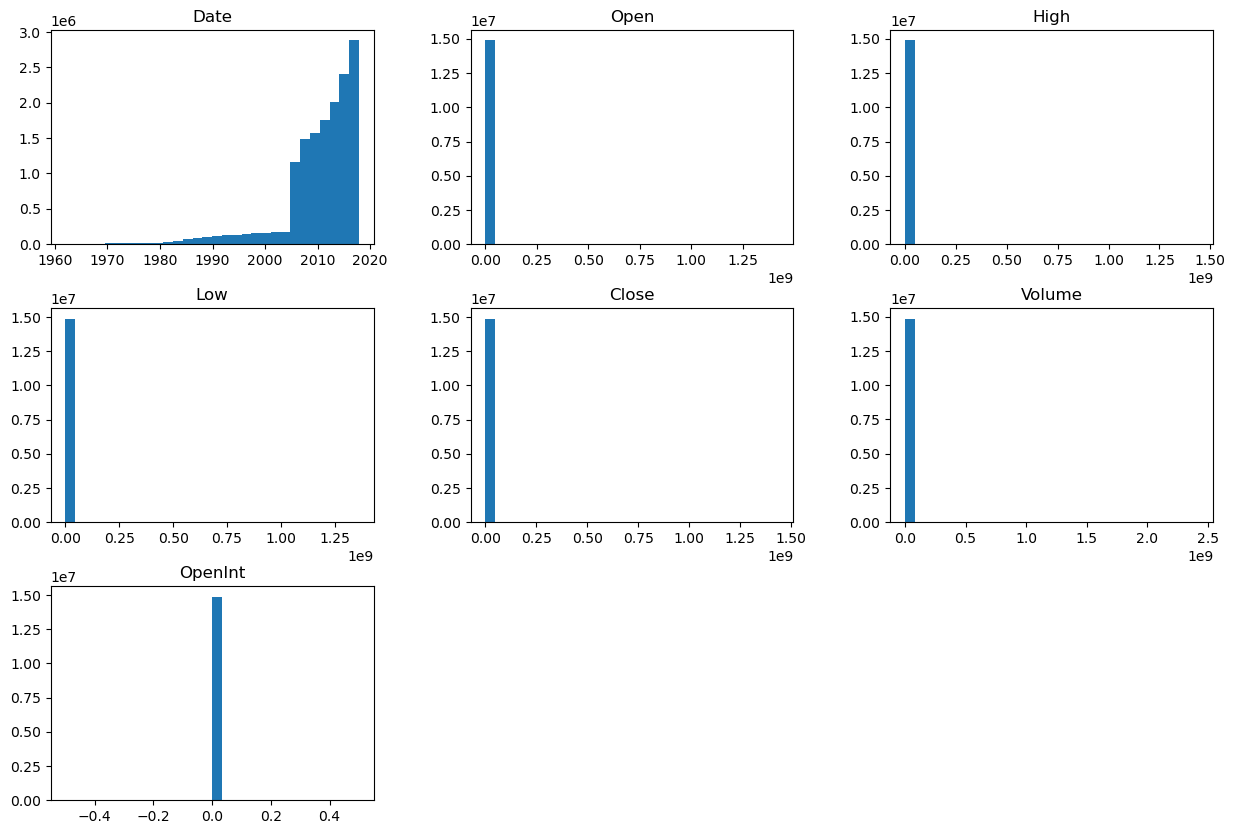

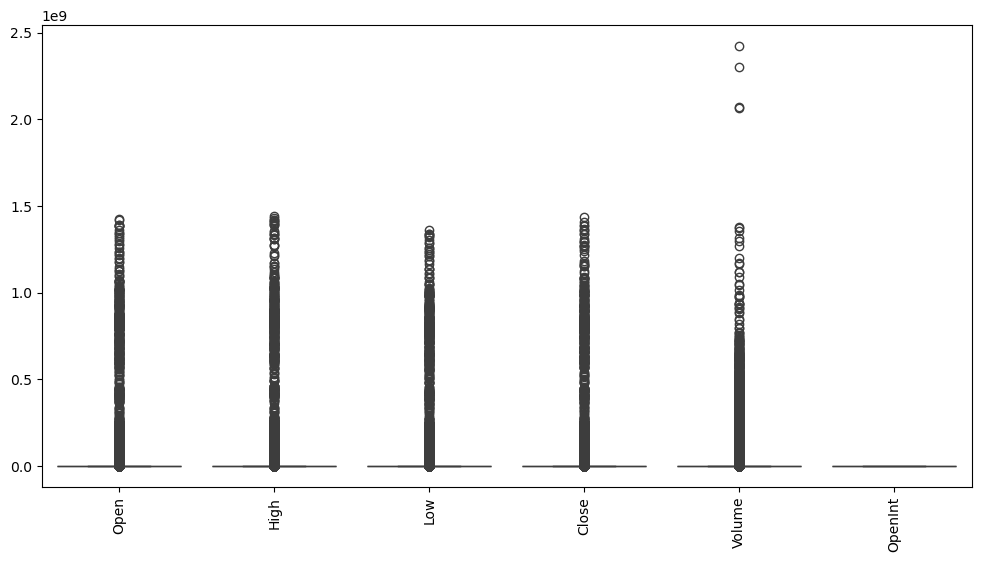

In [72]:
# Histogram for each column
stocks_data.hist(bins=30, figsize=(15, 10), grid=False)
# plt.savefig('..\\..\\assets\\column_histograms.jpg') 
plt.show()


# Boxplot to detect outliers (removing OBV bcs its rage too different)
plt.figure(figsize=(12, 6))
sns.boxplot(data=stocks_data)
plt.xticks(rotation=90)
plt.show()

In [74]:
# # Compute correlation matrix
# corr_matrix = stocks_data.corr()

# # Display the correlation heatmap
# plt.figure(figsize=(15, 10))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
# plt.title("Correlation Heatmap")
# plt.show()

## Data pre-processing for model

In [90]:
# Define the date range for filtering
start_date = "2011-01-01"
end_date = "2017-01-01"

# Dictionary to store individual DataFrames for each stock
filtered_stock_dfs = {}

# Filter stocks that contain data within the range and create separate DataFrames
for stock_name, stock_df in stocks_data.groupby("ticker"):
    # Ensure index is datetime
    stock_df = stock_df.reset_index().set_index("Date")  # Reset index to properly set "Date"
    stock_df.index = pd.to_datetime(stock_df.index, errors="coerce")

    # Filter data within the specified date range
    filtered_df = stock_df.loc[start_date:end_date]

    # Ensure the stock has data within the period before storing
    if not filtered_df.empty:
        filtered_stock_dfs[f"{stock_name}"] = filtered_df

# Create a summary DataFrame showing the count of records per stock
filtered_summary_df = pd.DataFrame.from_dict(
    {name: {"Rows Available": len(df)} for name, df in filtered_stock_dfs.items()}, 
    orient="index"
)

In [91]:
filtered_summary_df

,Rows Available
a,1510
aa,1510
aaap,287
aaba,1510
aac,567
...,...
ztr,1509
zts,987
zumz,1509
zx,1402


In [93]:
# Find the maximum row count in the summary DataFrame
max_count = filtered_summary_df["Rows Available"].max()

# Filter out stocks that have the largest count
filtered_summary_df = filtered_summary_df[filtered_summary_df["Rows Available"] == max_count]

In [94]:
filtered_summary_df

,Rows Available
a,1510
aa,1510
aaba,1510
aapl,1510
abc,1510
...,...
xray,1510
xrx,1510
yum,1510
zbh,1510


In [98]:
filtered_summary_df.index

Index(['a', 'aa', 'aaba', 'aapl', 'abc', 'abev', 'abt', 'abx', 'adbe', 'adi',
       ...
       'xel', 'xl', 'xlnx', 'xom', 'xoma', 'xray', 'xrx', 'yum', 'zbh',
       'zion'],
      dtype='object', length=414)

In [96]:
filtered_stock_dfs['aapl']

,index,Open,High,Low,Close,Volume,OpenInt,ticker
Date,,,,,,,,
2011-01-03,45725,41.600,42.293,41.600,42.204,123930383,0,aapl
2011-01-04,45726,42.579,42.579,42.023,42.426,86135637,0,aapl
2011-01-05,45727,42.260,42.817,42.196,42.772,70669988,0,aapl
2011-01-06,45728,42.902,42.932,42.632,42.739,83619699,0,aapl
2011-01-07,45729,42.787,43.073,42.503,43.045,86506108,0,aapl
...,...,...,...,...,...,...,...,...
2016-12-23,47230,113.760,114.680,113.760,114.680,13998412,0,aapl
2016-12-27,47231,114.680,115.930,114.650,115.410,17786684,0,aapl
2016-12-28,47232,115.650,116.150,114.360,114.920,19619378,0,aapl


In [99]:
# Keep only stocks that are present in filtered_summary_df
filtered_stock_dfs = {stock: df for stock, df in filtered_stock_dfs.items() if stock.replace("_df", "") in filtered_summary_df.index}

# Create an updated summary DataFrame
filtered_stock_dfs_summary = pd.DataFrame.from_dict(
    {name.replace("_df", ""): {"Rows Available": len(df)} for name, df in filtered_stock_dfs.items()}, 
    orient="index"
)

In [100]:
filtered_stock_dfs

{'a':             index    Open    High     Low   Close   Volume  OpenInt ticker
 Date                                                                      
 2011-01-03   2793  28.054  28.446  27.953  28.273  5291989        0      a
 2011-01-04   2794  28.343  28.419  27.800  28.005  5316520        0      a
 2011-01-05   2795  27.867  28.170  27.676  27.946  4788574        0      a
 2011-01-06   2796  27.926  28.245  27.813  27.999  4979414        0      a
 2011-01-07   2797  28.026  28.217  27.704  28.095  4038241        0      a
 ...           ...     ...     ...     ...     ...      ...      ...    ...
 2016-12-23   4298  45.638  45.788  45.490  45.758   734717        0      a
 2016-12-27   4299  45.927  46.208  45.877  46.065  1550334        0      a
 2016-12-28   4300  46.065  46.253  45.242  45.282  1175850        0      a
 2016-12-29   4301  45.374  45.691  45.264  45.334   897417        0      a
 2016-12-30   4302  45.454  45.513  45.071  45.254  1224312        0      a
 
 [151

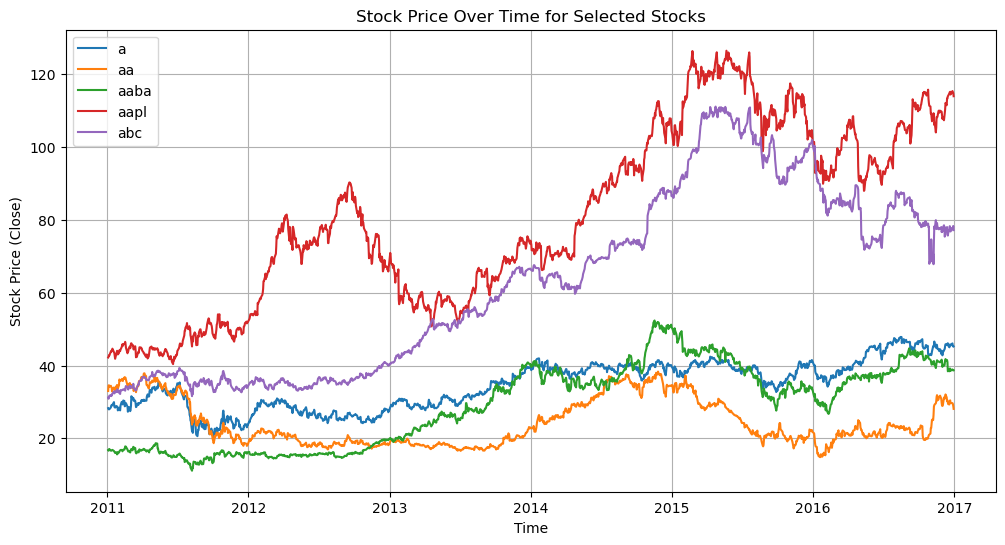

In [103]:
# Select five random stocks from the filtered list
selected_stocks = list(filtered_stock_dfs.keys())[:5]

# Plot stock price (Close) against time for selected stocks
plt.figure(figsize=(12, 6))
for stock in selected_stocks:
    stock_name = stock.replace("_df", "")
    plt.plot(filtered_stock_dfs[stock].index, filtered_stock_dfs[stock]["Close"], label=stock_name)

plt.xlabel("Time")
plt.ylabel("Stock Price (Close)")
plt.title("Stock Price Over Time for Selected Stocks")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

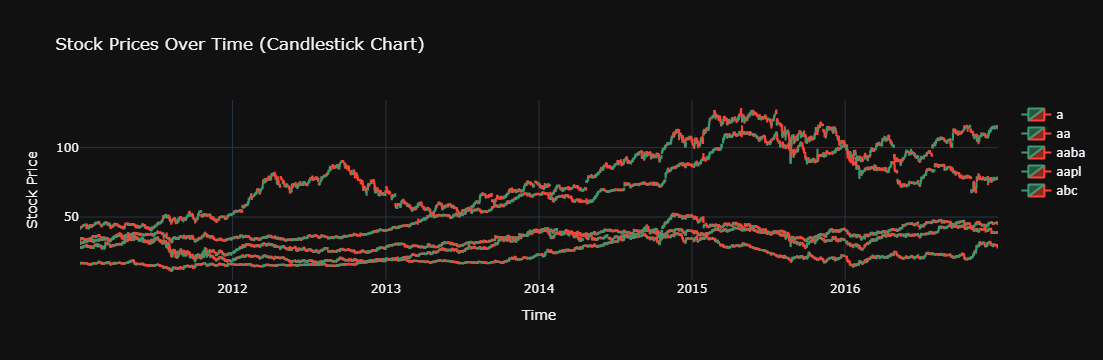

In [104]:
# Create figure
fig = go.Figure()

# Add traces for each selected stock
for stock in selected_stocks:
    stock_name = stock.replace("_df", "")
    stock_df = filtered_stock_dfs[stock]

    fig.add_trace(go.Candlestick(
        x=stock_df.index,
        open=stock_df["Open"],
        high=stock_df["High"],
        low=stock_df["Low"],
        close=stock_df["Close"],
        name=stock_name
    ))

# Update layout
fig.update_layout(
    title="Stock Prices Over Time (Candlestick Chart)",
    xaxis_title="Time",
    yaxis_title="Stock Price",
    xaxis_rangeslider_visible=False,
    template="plotly_dark"
)

# Show the plot
fig.show()


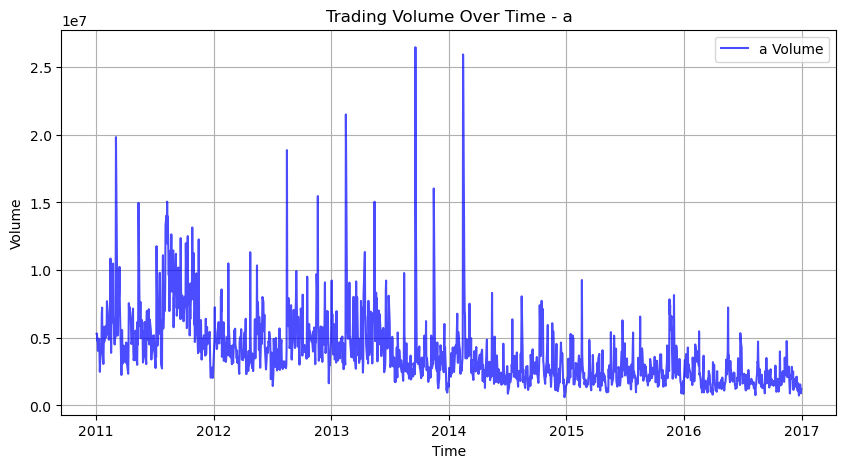

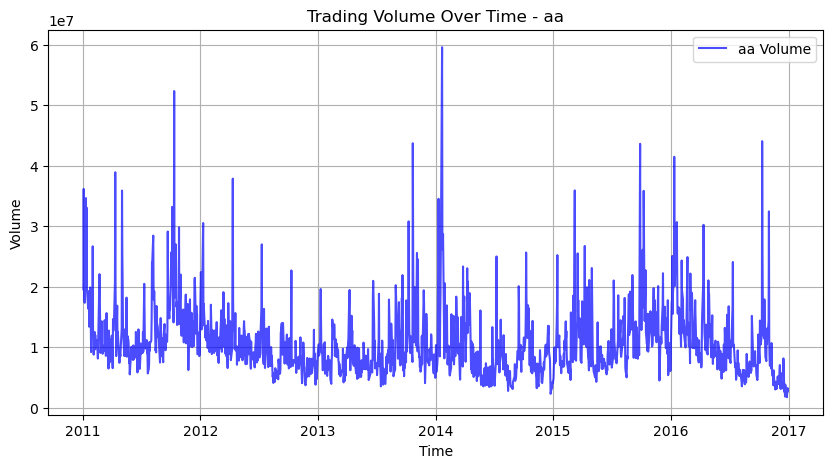

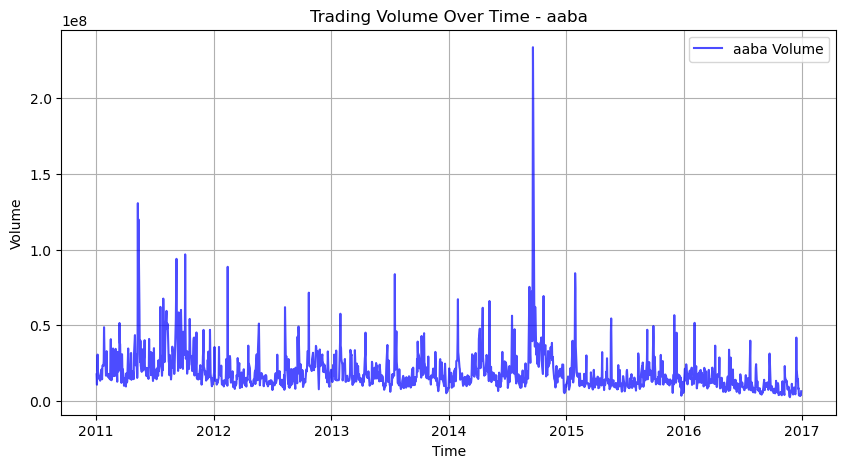

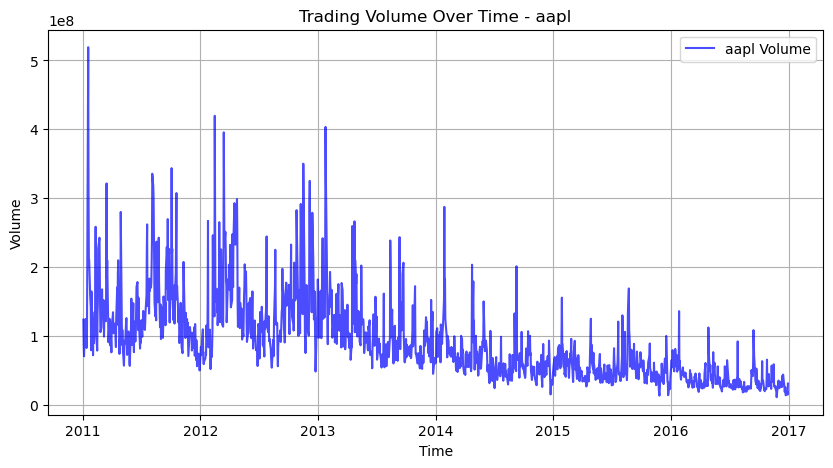

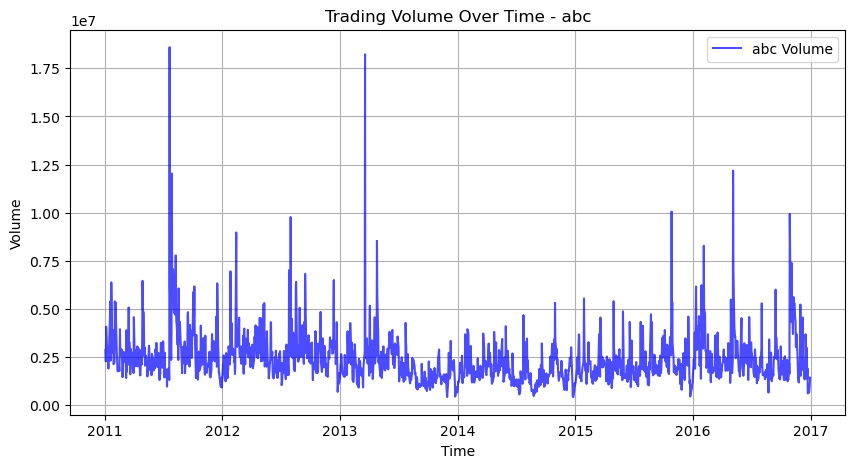

In [107]:
# Create separate figures for each stock's volume plot
for stock in selected_stocks:
    stock_name = stock.replace("_df", "")
    stock_df = filtered_stock_dfs[stock]

    # Create a new figure
    plt.figure(figsize=(10, 5))
    
    # Plot volume over time
    plt.plot(stock_df.index, stock_df["Volume"], label=f"{stock_name} Volume", color="blue", alpha=0.7)

    # Customize the plot
    plt.title(f"Trading Volume Over Time - {stock_name}")
    plt.xlabel("Time")
    plt.ylabel("Volume")
    plt.legend()
    plt.grid(True)

# Show the plot
plt.show()

In [111]:
data_change = pd.DataFrame()
# Calculate daily price change and % daily price change for each stock
for stock in selected_stocks:
    stock_name = stock.replace("_df", "")
    stock_df = filtered_stock_dfs[stock].copy()

    # Calculate daily price change
    stock_df["Daily Change"] = stock_df["Close"].diff()

    # Calculate % daily price change
    stock_df["% Daily Change"] = stock_df["Close"].pct_change() * 100
    data_change[stock]= ((filtered_stock_dfs[stock]['Close']-filtered_stock_dfs[stock]['Open'])/filtered_stock_dfs[stock]['Close'])*100

data_change.head()

,a,aa,aaba,aapl,abc
Date,,,,,
2011-01-03,0.774591,-0.121245,0.477612,1.431144,0.173027
2011-01-04,-1.206927,0.411702,-0.723327,-0.360628,-1.441669
2011-01-05,0.282688,1.321764,2.188054,1.197045,1.483774
2011-01-06,0.260724,-2.204462,0.879250,-0.381385,1.315374
2011-01-07,0.245595,-0.186671,-0.769231,0.599373,0.305377


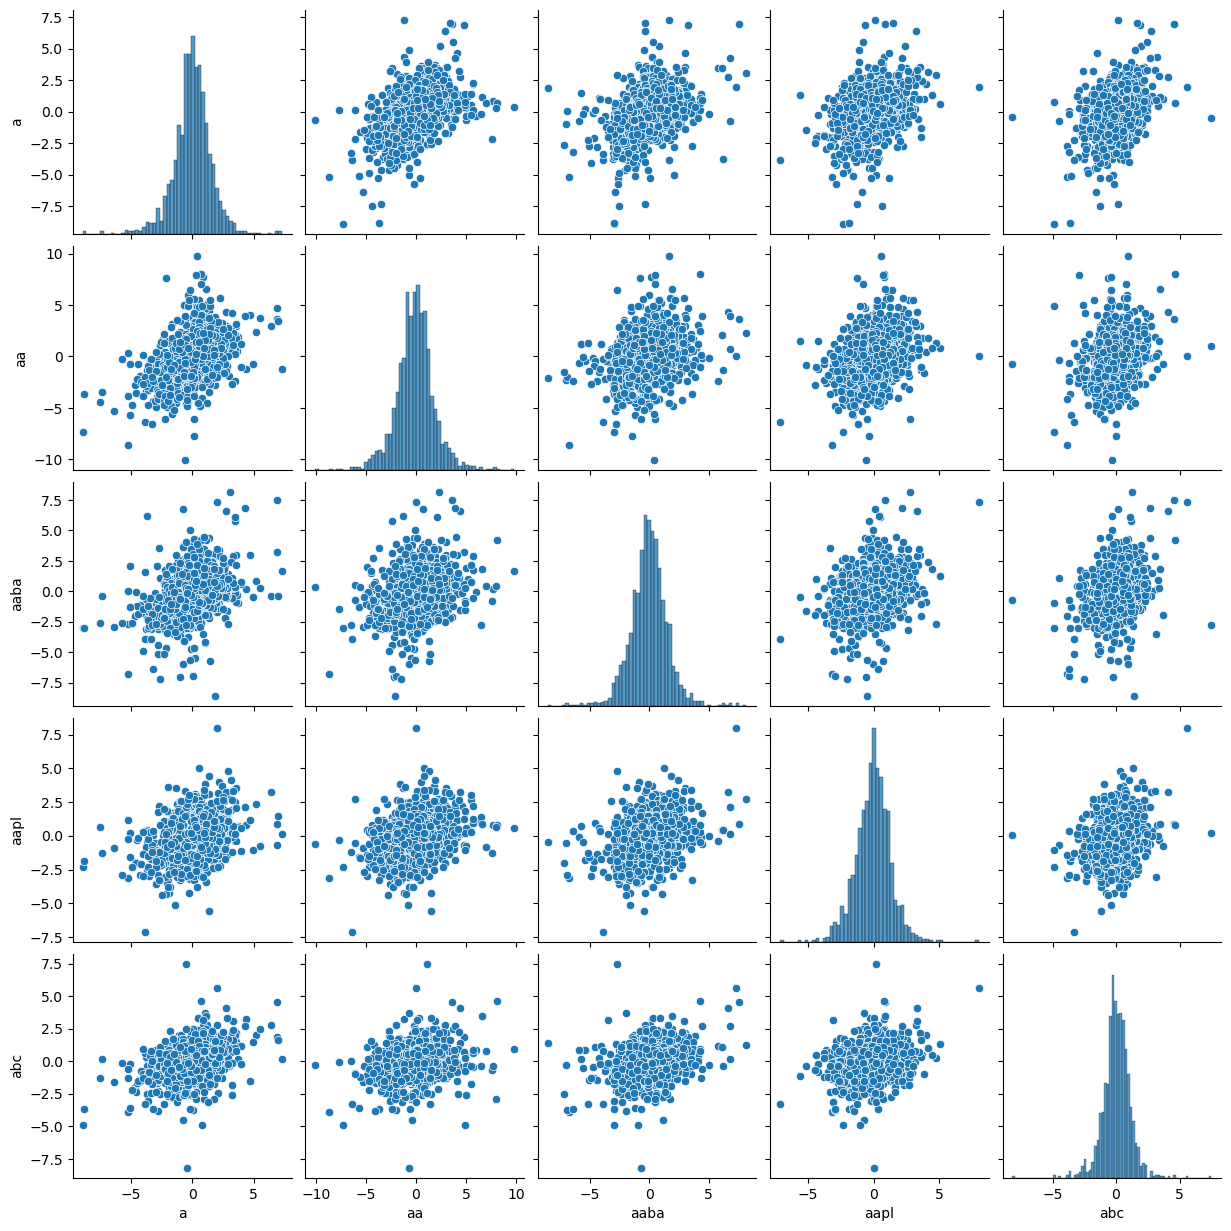

In [112]:
sns.pairplot(data_change)